In [1]:
import pandas as pd

In [114]:
df = pd.read_csv('final_dog_data2.csv', names=['dogID', 'counter','tstamp1','tstamp2','lon', 'lat','dogTag'])

In [115]:
df.head()

dogID  counter       tstamp1       tstamp2        lon       lat  dogTag
0  148849   0.00.0  42403.000000  42481.066667  148.30818 -35.90056      26
1  148849  78.02.0  42481.083333  42481.088194  148.30859 -35.90048      26
2  148849  78.02.5  42481.104167  42481.107639  148.30940 -35.90077      26
3  148849  78.03.5  42481.145833  42481.151389  148.31055 -35.90054      26
4  148849  78.04.5  42481.187500  42481.193056  148.31072 -35.90048      26

In [111]:
#df['hour'] = df.iloc[0:5,1].str.split('.', expand=True)[1]

In [116]:
#df.head(200)

In [117]:
from math import radians, cos, sin, asin, sqrt

def haversine(row):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    lon1, lat1, lon2, lat2 = row['lon'], row['lat'], row['pre_lon'], row['pre_lat']
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6371 # Radius of earth in kilometers. Use 3956 for miles
    # convert to m
    return (c * r) * 1000

In [118]:
df['pre_lon'] = df['lon'].shift()
df['pre_lat'] = df['lat'].shift()

In [119]:
df.head()

dogID  counter       tstamp1       tstamp2        lon       lat  dogTag  \
0  148849   0.00.0  42403.000000  42481.066667  148.30818 -35.90056      26   
1  148849  78.02.0  42481.083333  42481.088194  148.30859 -35.90048      26   
2  148849  78.02.5  42481.104167  42481.107639  148.30940 -35.90077      26   
3  148849  78.03.5  42481.145833  42481.151389  148.31055 -35.90054      26   
4  148849  78.04.5  42481.187500  42481.193056  148.31072 -35.90048      26   

     pre_lon   pre_lat  
0        NaN       NaN  
1  148.30818 -35.90056  
2  148.30859 -35.90048  
3  148.30940 -35.90077  
4  148.31055 -35.90054

In [120]:
df['dist'] = df.apply(haversine, axis=1)

In [121]:
df.head()

dogID  counter       tstamp1       tstamp2        lon       lat  dogTag  \
0  148849   0.00.0  42403.000000  42481.066667  148.30818 -35.90056      26   
1  148849  78.02.0  42481.083333  42481.088194  148.30859 -35.90048      26   
2  148849  78.02.5  42481.104167  42481.107639  148.30940 -35.90077      26   
3  148849  78.03.5  42481.145833  42481.151389  148.31055 -35.90054      26   
4  148849  78.04.5  42481.187500  42481.193056  148.31072 -35.90048      26   

     pre_lon   pre_lat        dist  
0        NaN       NaN         NaN  
1  148.30818 -35.90056   37.985772  
2  148.30859 -35.90048   79.766738  
3  148.30940 -35.90077  106.693088  
4  148.31055 -35.90054   16.702572

In [122]:
import datetime

def xldate_as_datetime(df):
    # datemode: 0 for 1900-based, 1 for 1904-based
    datemode=0
    epoch = datetime.datetime(1899, 12, 30)
    excel_date = datetime.timedelta(days=df['tstamp1'] + 1462 * datemode)
    return epoch + excel_date

In [123]:
df.apply(xldate_as_datetime, axis=1).head()

0   2016-02-03 00:00:00.000000
1   2016-04-21 02:00:00.000785
2   2016-04-21 02:30:00.000786
3   2016-04-21 03:30:00.000786
4   2016-04-21 04:30:00.000786
dtype: datetime64[ns]

In [124]:
#df.apply(xldate_as_datetime, axis=1).head()

In [125]:
df.head()

dogID  counter       tstamp1       tstamp2        lon       lat  dogTag  \
0  148849   0.00.0  42403.000000  42481.066667  148.30818 -35.90056      26   
1  148849  78.02.0  42481.083333  42481.088194  148.30859 -35.90048      26   
2  148849  78.02.5  42481.104167  42481.107639  148.30940 -35.90077      26   
3  148849  78.03.5  42481.145833  42481.151389  148.31055 -35.90054      26   
4  148849  78.04.5  42481.187500  42481.193056  148.31072 -35.90048      26   

     pre_lon   pre_lat        dist  
0        NaN       NaN         NaN  
1  148.30818 -35.90056   37.985772  
2  148.30859 -35.90048   79.766738  
3  148.30940 -35.90077  106.693088  
4  148.31055 -35.90054   16.702572

In [126]:
df['ts'] = df.apply(xldate_as_datetime, axis=1)

In [127]:
# ts: year-month-day hr:min:sec
df.head()

dogID  counter       tstamp1       tstamp2        lon       lat  dogTag  \
0  148849   0.00.0  42403.000000  42481.066667  148.30818 -35.90056      26   
1  148849  78.02.0  42481.083333  42481.088194  148.30859 -35.90048      26   
2  148849  78.02.5  42481.104167  42481.107639  148.30940 -35.90077      26   
3  148849  78.03.5  42481.145833  42481.151389  148.31055 -35.90054      26   
4  148849  78.04.5  42481.187500  42481.193056  148.31072 -35.90048      26   

     pre_lon   pre_lat        dist                         ts  
0        NaN       NaN         NaN 2016-02-03 00:00:00.000000  
1  148.30818 -35.90056   37.985772 2016-04-21 02:00:00.000785  
2  148.30859 -35.90048   79.766738 2016-04-21 02:30:00.000786  
3  148.30940 -35.90077  106.693088 2016-04-21 03:30:00.000786  
4  148.31055 -35.90054   16.702572 2016-04-21 04:30:00.000786

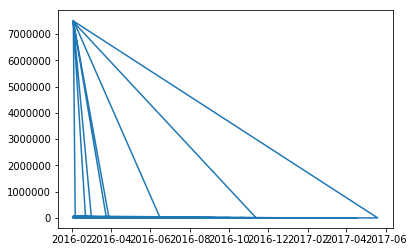

In [89]:
import matplotlib.pylab as plt
plt.plot(df['ts'], df['dist'])

In [128]:
# get rid of the NZ cordinates
df_filt = df[df['dist']<1000]

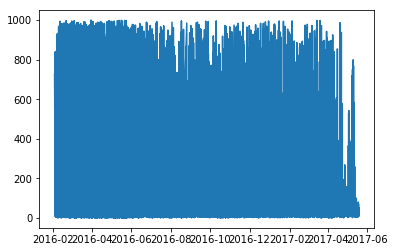

In [92]:
#plt.plot(temp['ts'], temp['dist'])

In [129]:
df_filt.to_csv('dogs_data_timestamp.csv', index=False)

In [105]:
a = temp[temp['dogID'] == 148845]

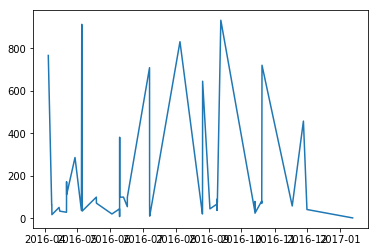

In [106]:
plt.plot(a['ts'], a['dist'])